# 目录
## 支持向量机
- SVC 线性核分类
- SVC 高斯核分类
- 网格搜索法确定最优参数

## 垃圾邮件分类器
- SVC 分类器
- 朴素贝叶斯 分类器

# Support Vector Machines

In [14]:
import scipy.io as sio
data = sio.loadmat('ex6data1.mat')
print type(data)
print data.keys()

<type 'dict'>
['y', 'X', '__version__', '__header__', '__globals__']


(51, 2)
(51, 1)


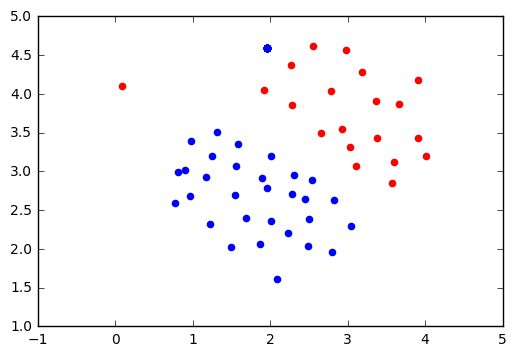

In [15]:
X = data['X']
y = data['y']
print X.shape
print y.shape
import matplotlib.pyplot as plt
import numpy as np

pos = np.where(y==1)
neg = np.where(y==0)
plt.scatter(X[pos, 0], X[pos, 1], color='red')
plt.scatter(X[neg, 0], X[neg, 1], color='b')
plt.show()

In [16]:
from sklearn.svm import SVC
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, y)

/Users/hehongwei/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
print clf.coef_
print clf.intercept_

[[ 1.40718563  2.13398052]]
[-10.34889778]


In [18]:
# 画出决策边界,这种画法 个人比较喜欢
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

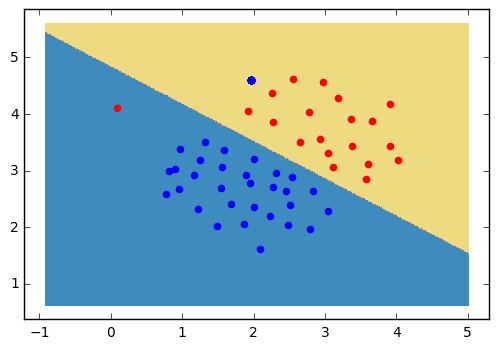

In [19]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
pos = np.where(y==1)
neg = np.where(y==0)
plt.scatter(X[pos, 0], X[pos, 1], color='red')
plt.scatter(X[neg, 0], X[neg, 1], color='b')
plt.show()

In [20]:
# 调整C为100
clf = SVC(C=100, kernel='linear')
clf.fit(X, y)

/Users/hehongwei/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

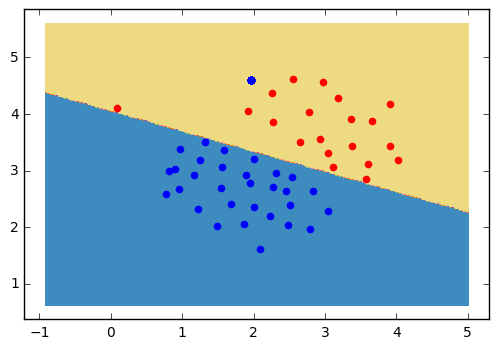

In [21]:
# 画出决策边界,这种画法 个人比较喜欢
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
pos = np.where(y==1)
neg = np.where(y==0)
plt.scatter(X[pos, 0], X[pos, 1], color='red')
plt.scatter(X[neg, 0], X[neg, 1], color='b')
plt.show()

### C越大，会过拟合

## 高斯核

In [22]:
import scipy.io as sio
data = sio.loadmat('ex6data2.mat')
print data.keys()

['y', 'X', '__version__', '__header__', '__globals__']


(863, 2)
(863, 1)


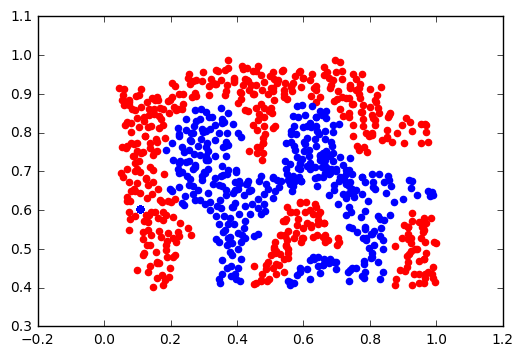

In [23]:
X = data['X']
y = data['y']
print X.shape
print y.shape
import matplotlib.pyplot as plt
import numpy as np

pos = np.where(y==1)
neg = np.where(y==0)
plt.scatter(X[pos, 0], X[pos, 1], color='red')
plt.scatter(X[neg, 0], X[neg, 1], color='b')
plt.show()

In [24]:
from sklearn.svm import SVC
clf = SVC(C=1.0, gamma=1000)  # 默认是 高斯核,这里的 gamma和公式中得sigma不是一回事，简单倒数关系
clf.fit(X, y)

/Users/hehongwei/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1000, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

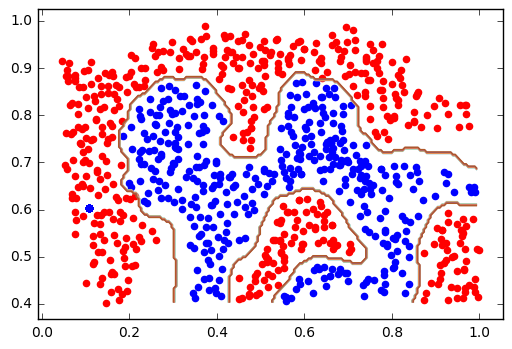

In [25]:
# 画出决策边界,这种画法 个人比较喜欢
h = 0.005
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
pos = np.where(y==1)
neg = np.where(y==0)
plt.scatter(X[pos, 0], X[pos, 1], color='red')
plt.scatter(X[neg, 0], X[neg, 1], color='b')
plt.show()

In [26]:
import scipy.io as sio
data = sio.loadmat('ex6data3.mat')
print data.keys()

['yval', '__header__', '__globals__', 'Xval', 'y', 'X', '__version__']


In [27]:
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']

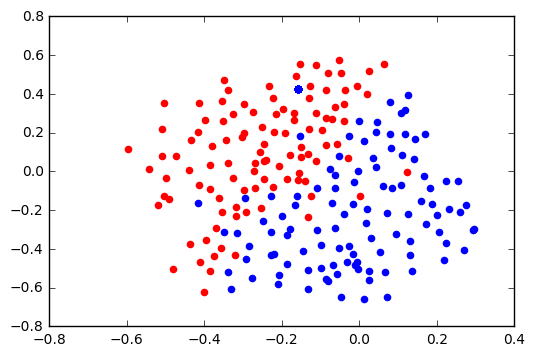

In [28]:
import matplotlib.pyplot as plt
import numpy as np

pos = np.where(y==1)
neg = np.where(y==0)
plt.scatter(X[pos, 0], X[pos, 1], color='red')
plt.scatter(X[neg, 0], X[neg, 1], color='b')
plt.show()

In [33]:
from sklearn.svm import SVC
clf = SVC(C=1.0, gamma=1000)  # 默认是 高斯核,这里的 gamma和公式中得sigma不是一回事，简单倒数关系
clf.fit(X, y)

/Users/hehongwei/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1000, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

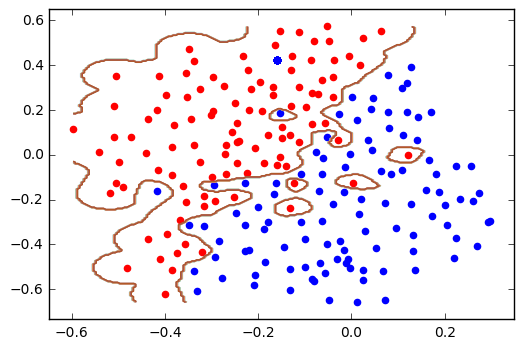

In [34]:
# 画出决策边界,这种画法 个人比较喜欢
h = 0.005
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
pos = np.where(y==1)
neg = np.where(y==0)
plt.scatter(X[pos, 0], X[pos, 1], color='red')
plt.scatter(X[neg, 0], X[neg, 1], color='b')
plt.show()

这个过拟合 也太牛逼了,gamma 太大了

## 下面用网格搜索法 确定C和gamma

In [35]:
from sklearn.grid_search import GridSearchCV

from sklearn.cross_validation import ShuffleSplit
# cv_sets = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2, random_state=0)
# print type(cv_sets)
C_array = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 60, 100]
gamma_array = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
param_grid = [{'C': C_array, 'gamma': gamma_array}]
gs = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=5)
gs.fit(X, y.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 60, 100], 'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [36]:
print gs.best_score_
print gs.best_params_
print gs.best_estimator_

0.919431279621
{'C': 30, 'gamma': 3}
SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


/Users/hehongwei/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


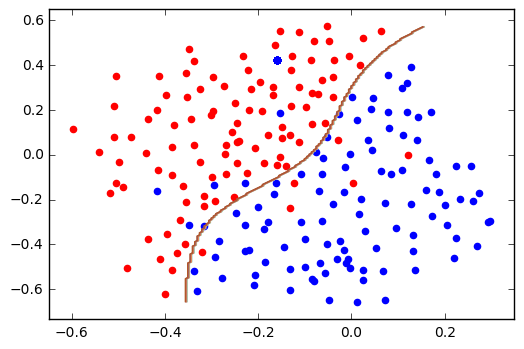

In [37]:
from sklearn.svm import SVC
clf = SVC(C=30.0, gamma=3)  # 默认是 高斯核,这里的 gamma和公式中得sigma不是一回事，简单倒数关系
clf.fit(X, y)
# 画出决策边界,这种画法 个人比较喜欢
h = 0.005
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
pos = np.where(y==1)
neg = np.where(y==0)
plt.scatter(X[pos, 0], X[pos, 1], color='red')
plt.scatter(X[neg, 0], X[neg, 1], color='b')
plt.show()

# 垃圾邮件分类器

In [1]:
File = open('emailSample1.txt')
file_contents = File.read()
print type(file_contents)
print file_contents

<type 'str'>
> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




In [12]:
# 需要先对邮件进行文本预处理
from processEmail import processEmail
from emailFeatures import emailFeatures
import numpy as np
word_indices = processEmail(file_contents)
features = emailFeatures(word_indices)
print np.size(features, axis=1)
print np.sum(features)

1899
45.0


In [3]:
# 用SVC线性核进行学习
# 导入训练数据，其中包含了4000个样例，每个样例1899个特征
import scipy.io as sio
data = sio.loadmat('spamTrain.mat')
print data.keys()

['y', 'X', '__version__', '__header__', '__globals__']


In [4]:
X = data['X']
y = data['y']
print X.shape
print y.shape

(4000, 1899)
(4000, 1)


In [5]:
from sklearn.svm import SVC
clf = SVC(C=100)
clf.fit(X, y.ravel())

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
# pre_y = clf.predict(X)
# print pre_y.shape
# print y.shape

In [7]:
print clf.score(X, y)
# print np.mean(pre_y==y.ravel())

0.999


In [8]:
data_test = sio.loadmat('spamTest.mat')
print data_test.keys()

['ytest', 'Xtest', '__version__', '__header__', '__globals__']


In [9]:
Xtest = data_test['Xtest']
ytest = data_test['ytest']
print Xtest.shape
print ytest.shape

(1000, 1899)
(1000, 1)


In [10]:
# pre_test_y = clf.predict(Xtest)
print clf.score(Xtest, ytest)
# print np.mean((pre_test_y==ytest.ravel()))

0.99


为什么我这里 C=0.1的时候准确率这么低，C=100还不错

In [ ]:
# 使用网格搜索查找下最优参数
from sklearn.grid_search import GridSearchCV
C_array = [0.01, 0.1, 1, 10, 50, 100]
gamma_array = [0.01, 0.1, 1, 10, 50, 100]
param_grid = [{'C': C_array, 'kernel': ['linear']},{'C': C_array, 'gamma': gamma_array, 'kernel': ['rbf']}]
gs = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=3)
gs.fit(X, y.ravel())

测试一下文件夹中得4封邮件，
 - emailSample1.txt,
 - emailSample2.txt,
 - spamSample1.txt,
 - spamSample2.txt

In [11]:
filename = 'emailSample1.txt'
f = open(filename)
file_contents = f.read()
word_indices = processEmail(file_contents)
X = emailFeatures(word_indices)
# 

print clf.predict(X)

[0]


In [13]:
filenames = ['emailSample1.txt', 'emailSample2.txt', 'spamSample1.txt', 'spamSample2.txt']
for filename in filenames:
    f = open(filename)
    file_contents = f.read()
    word_indices = processEmail(file_contents)
    X = emailFeatures(word_indices)
    print clf.predict(X)

[0]
[0]
[1]
[1]


## 朴素贝叶斯垃圾邮件分类

In [44]:
# 导入训练数据，其中包含了4000个样例，每个样例1899个特征
import scipy.io as sio
data = sio.loadmat('spamTrain.mat')
X = data['X']
y = data['y']

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X, y.ravel())

GaussianNB()

In [45]:
gnb.score(X, y)

0.85424999999999995

In [48]:
gnb.score(Xtest, ytest)
# print Xtest.shape
# print ytest.shape
# print X.shape
# print y.shape

0.872

In [49]:
filenames = ['emailSample1.txt', 'emailSample2.txt', 'spamSample1.txt', 'spamSample2.txt']
for filename in filenames:
    f = open(filename)
    file_contents = f.read()
    word_indices = processEmail(file_contents)
    X = emailFeatures(word_indices)
    print gnb.predict(X)

[1]
[0]
[1]
[1]


朴素贝叶斯 高斯模型分类效果并不是很好
下面使用多项式模型，适用于文本分类

In [52]:
# 导入训练数据，其中包含了4000个样例，每个样例1899个特征
import scipy.io as sio
data = sio.loadmat('spamTrain.mat')
X = data['X']
y = data['y']

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X, y.ravel())

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
mnb.score(X, y)

0.97199999999999998

In [54]:
mnb.score(Xtest, ytest)

0.97299999999999998

In [55]:
filenames = ['emailSample1.txt', 'emailSample2.txt', 'spamSample1.txt', 'spamSample2.txt']
for filename in filenames:
    f = open(filename)
    file_contents = f.read()
    word_indices = processEmail(file_contents)
    X = emailFeatures(word_indices)
    print mnb.predict(X)

[0]
[0]
[1]
[1]


总结：朴素贝叶斯 计算速度快